## step 0. 머신러닝 프로젝트의 큰 틀

< 머신러닝 프로젝트의 큰 틀 >
1. 모델의 목적 살펴보기, 큰 그림 그리기

2. 사용 데이터 구하기

3. 데이터에 대해 살펴보기 (EDA)

4. 데이터 전처리하기 (알고리즘을 위한 데이터 처리)

5. 모델 선택 및 Train

6. 초기 모델을 발전시키며 모델 수정

7. 솔루션 제시 및 유지 보수

##Step 1. 목적 살펴보기, 큰그림 그리기

주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다.
 이 때 적당한 숙박료를 구하시오.

----------
데이터 소개 : New York City Airbnb Open Data

    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수
---

### 문제 0.Train data와 target data는 무엇이 되어야할지 스스로 정의내린 후에 step 2로 넘어가세요!




```
target data : price 
train data : neighbourhood_group, room_type, number_of_reviews, reviews_per_month, availability_365
```





## Step 2. 데이터셋 준비하기

In [2]:
#기본적인 Library 불러오기
#아래 Library를 처음보신다면 각각 어떤 역할을 하는지 대략적으로 찾아보세요!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 구글 드라이브를 연동시키는 작업입니다. 데이터를 구글 드라이브에 올려놓고 불러오는 분들만 사용하시면 됩니다!
# 데이터를 불러오는 다른 방법을 사용하셔도 좋아요!

# from google.colab import drive
# drive.mount('/content/drive')

### 문제 1. Pandas 라이브러리로 csv파일 읽어들이기


In [4]:
# PATH = "/content/drive/MyDrive/kubig_ML"

# df = pd.read_csv(PATH+"/AB_NYC_2019.csv")

df = pd.read_csv("AB_NYC_2019.csv")

## Step 3. 데이터에 대해 살펴보기 (EDA 및 데이터 기초 통계 분석)


### 문제 2-1. 데이터 구조 살펴보기

In [5]:
# DataFrame에서 제공하는 Method를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info())

df.info() # data type 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 문제 2-2. 'room_type' 변수에 어떤 종류가 있는지 살펴보기

In [7]:
# value_counts()

df["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### 문제 2-3. 기초 통계량 확인해보기

In [8]:
# describe()

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 문제 3. 각 feature 별로 시각화해서 살펴보기

In [10]:
# 기본적인 시각화의 방법은 다양합니다!
# 각자 다양한 방식으로 전처리전 데이터에 대한 시각화를 진행해보세요!

위에서 선정한
```
neighbourhood_group / room_type / number_of_reviews / reviews_per_month / availability_365
```
에 대하여 자체적인 + `price`와 연관된 시각화

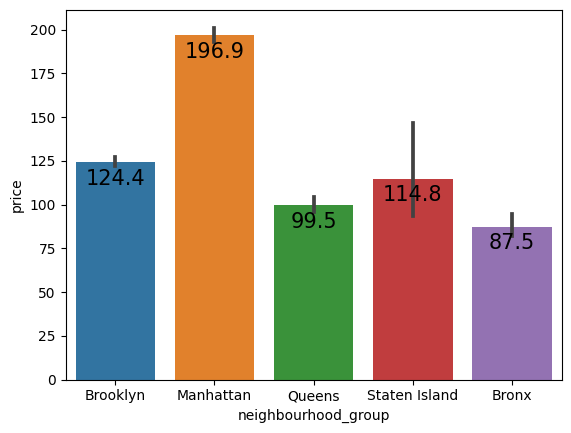

In [11]:
# neighbourhood_group 별 price
bplot = sns.barplot(x='neighbourhood_group', y='price', data=df)
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

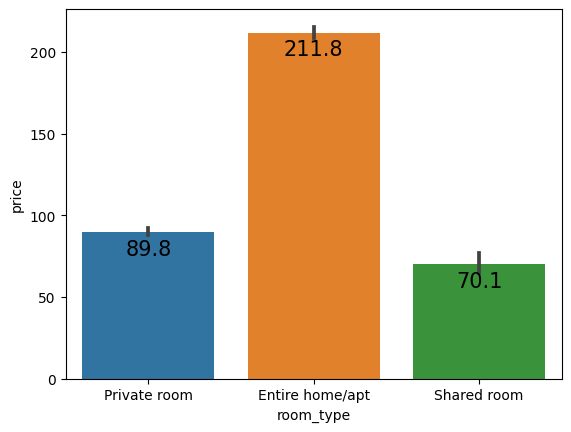

In [12]:
# room_type 별 price
bplot = sns.barplot(x='room_type', y='price', data=df)
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

<AxesSubplot: xlabel='availability_365', ylabel='Count'>

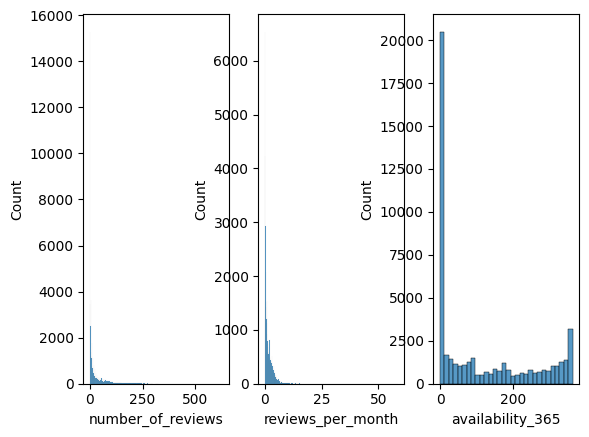

In [13]:
# number_of_reviews, review_per_month, availability_365의 히스토그램
fig, ax=plt.subplots(ncols=3)
sns.histplot(x='number_of_reviews', data=df, ax=ax[0])
sns.histplot(x='reviews_per_month', data=df, ax=ax[1])
sns.histplot(x='availability_365', data=df, ax=ax[2])
# 분포가 잘 보이지 않으므로 다른 방식 사용

C:\Users\rayhw\AppData\Local\Temp\ipykernel_18128\2614760363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_of_reviews'], hist=True, kde=True,


<AxesSubplot: xlabel='number_of_reviews', ylabel='Density'>

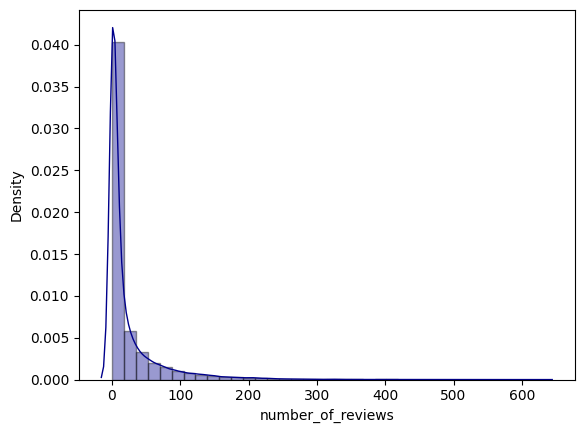

In [14]:
# number_of_reviews의 분포도
sns.distplot(df['number_of_reviews'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
# 많이 right_skewed한 모양

C:\Users\rayhw\AppData\Local\Temp\ipykernel_18128\923158522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reviews_per_month'], hist=True, kde=True,


<AxesSubplot: xlabel='reviews_per_month', ylabel='Density'>

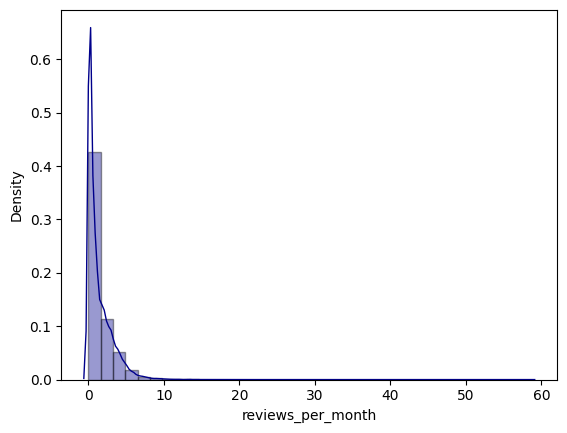

In [15]:
# reviews_per_month의 분포도
sns.distplot(df['reviews_per_month'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
# 역시 많이 right_skewed한 모양

C:\Users\rayhw\AppData\Local\Temp\ipykernel_18128\714953542.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['availability_365'], hist=True, kde=True,


<AxesSubplot: xlabel='availability_365', ylabel='Density'>

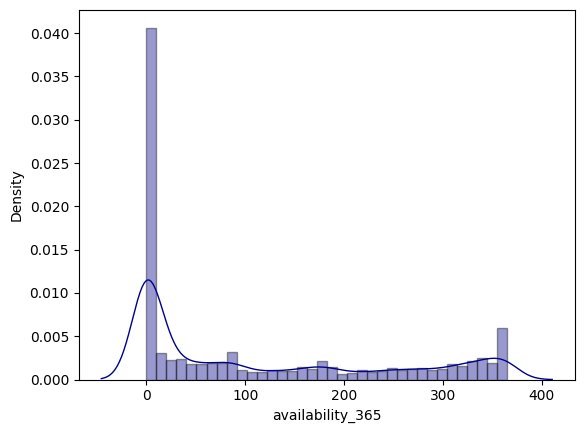

In [16]:
# availability_365의 분포도
sns.distplot(df['availability_365'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
# 살짝이지만 bimodal함이 보인다

### 문제 4. 각 feature 별로 결측치가 있는지 살펴보기

In [17]:
# 마찬가지로 결측치를 찾는 방법도 다양합니다. 가장 일반적으로 사용하는 method를 힌트로 첨부했습니다.
# 추후 프로젝트를 진행하시면서 스스로 다양한 방식을 사용해보세요!
# { isna().sum(), info() }

In [18]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 문제 5. reviews_per_month와 price의 scatter plot 그리기


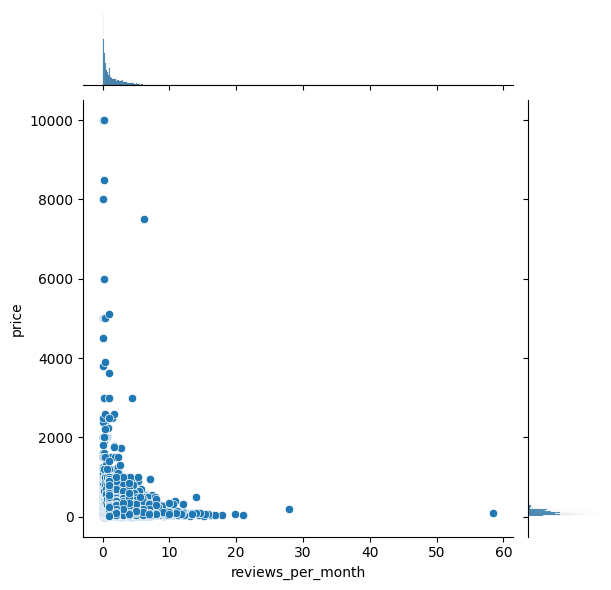

In [19]:
# 어떤 방법을 쓰셔도 상관없습니다.
# sns.jointplot()
sns.jointplot(data=df, x="reviews_per_month", y="price")

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

C:\Users\rayhw\AppData\Local\Temp\ipykernel_18128\4033442099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="Oranges")


<AxesSubplot: >

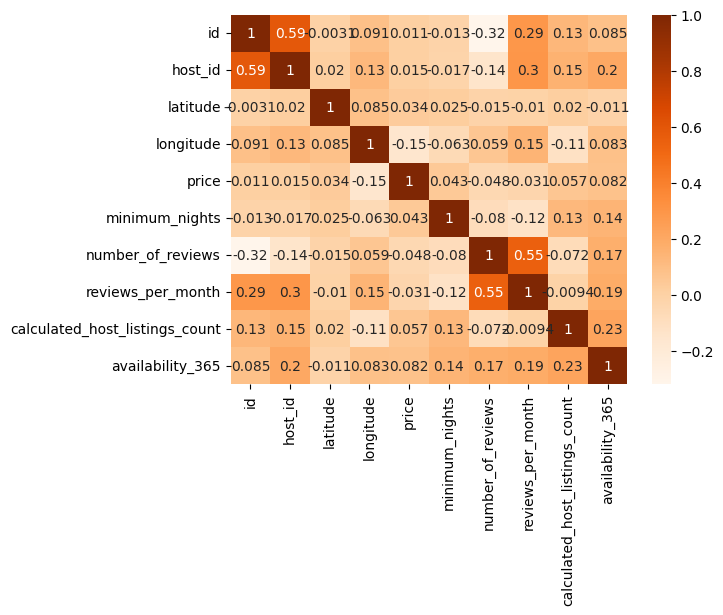

In [20]:
# sns.heatmap()
sns.heatmap(df.corr(), annot = True, cmap="Oranges")

### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#### 문제 7-1. neighbourhood_group 변수와 price 사이의 분포를 boxplot으로 그려보세요.

<AxesSubplot: title={'center': 'neighbourhood_group & price'}, xlabel='neighbourhood_group', ylabel='price'>

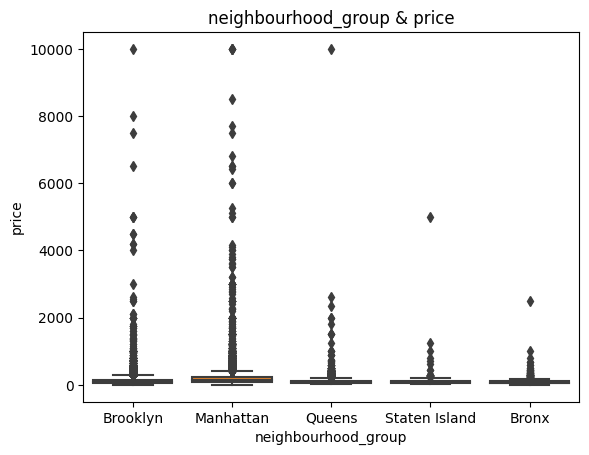

In [22]:
# sns.boxplot()
%matplotlib inline
plt.title("neighbourhood_group & price")
plt.xlabel("Type of neighbourhood")
plt.ylabel("Price")
sns.boxplot(x="neighbourhood_group", y="price", data=df)

#### 문제 7-2. room_type 변수와 price 사이의 분포를 boxplot으로 그려보세요.

<AxesSubplot: xlabel='room_type', ylabel='price'>

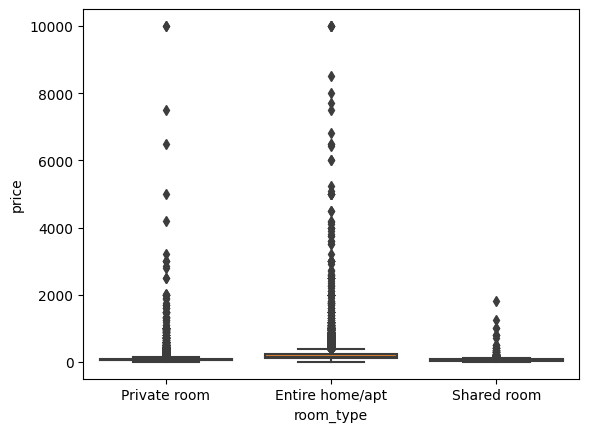

In [23]:
sns.boxplot(x='room_type', y='price', data=df)

## Step 4-1. 데이터 전처리하기

### 문제 8-1. 결측치 처리하기

In [24]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인
# fill(), dropna() 등으로 미기입된 데이터를 처리하기
# 결측치는 개인적 판단에 따라 drop하셔도 되고, 특정 값으로 채우셔도 됩니다!



In [25]:
# 전반적인 결측치 파악
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [26]:
# name과 host_name은 큰 영향이 없을것으로 보임
# last_review와 reviews_per_month의 결측치 수가 같음, 혹시 같은 행들인지 확인
sum(df['last_review'].isna() == df['reviews_per_month'].isna())
# last_review와 reviews_per_month에서 결측치가 나타나는 행은 같은 행들이다
# 아마 last_review가 없다면 reviews_per_month 자체가 계산이 안되었을 것을 생각 가능

48895

In [27]:
# 우선 last_review가 작성되지 않은 데이터 drop
df = df.dropna(subset = ['last_review'])
df['last_review'].isna().sum()

0

In [28]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [29]:
# 시각화에서 확인했듯 reviews_per_month는 skewed된 형태이므로 평균보다 중위수가 적합하다고 판단
df['reviews_per_month'].fillna(df.median)
df['reviews_per_month'].isna().sum()

0

In [30]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


C:\Users\rayhw\AppData\Local\Temp\ipykernel_18128\2072966911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reviews_per_month']) # 위에서보다 density가 높아짐


<AxesSubplot: xlabel='reviews_per_month', ylabel='Density'>

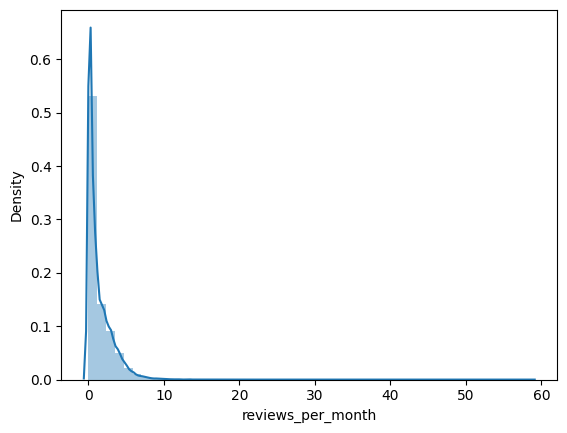

In [31]:
sns.distplot(df['reviews_per_month']) # 위에서보다 density가 높아짐

### 문제 8-2. 학습에 필요없는 column이라고 판단된다면 제거하기

In [32]:
# 'id', 'name', 'host_name', 'latitude', 'longitude' feature를 제거해보세요!
# 각자 판단하여 위 column을 살려서 활용하고, 다른 Column을 제거하셔도 됩니다!
# drop()
df = df.drop(columns = ['id', 'name', 'host_name', 'latitude', 'longitude'])

### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

In [33]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기
# 예시 코드를 제공하겠습니다!
# 기본 코드니까 이게 반드시 정답인건 아니고, 이런식으로 파이썬으로 데이터 전처리를 한다 정도로만 보시면 될 것 같아요

In [34]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1, p2)

330.0 27.0


In [35]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

<AxesSubplot: >

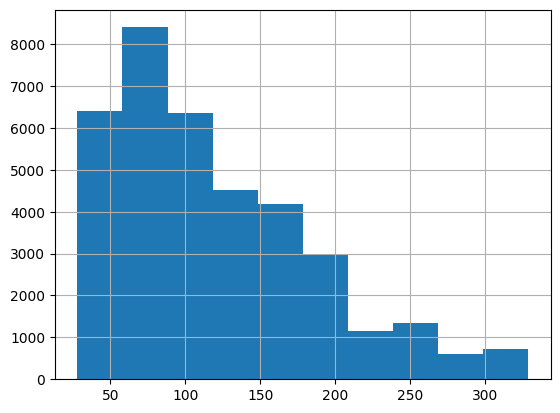

In [36]:
df['price'].hist()

## Step 4-2. 데이터 전처리하기 

### 문제 10. get_dummies를 이용한 범주형 데이터 전처리

In [37]:
# 어떤 column이 범주형이고, 어떤 column이 수치형인지 스스로 판단해보세요
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [38]:
# 예시 코드를 제공하겠습니다.
# 코드 그 자체보다 왜 범주형 데이터를 따로 전처리해줘야하는지에 집중해서 공부하세요!

X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type']]
X_cat = pd.get_dummies(X_cat)


### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# 예시 코드를 제공하겠습니다.
# 마찬가지로 왜 수치형 데이터를 전처리 해줬을지에 대해 생각해보세요!

In [41]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 
                 'last_review'], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)


In [42]:
# 범주형 데이터와 수치형 데이터를 단순히 합치는 작업
X = pd.concat([X_scaled, X_cat], axis=1)

# target 변수인 y를 지정해준 작업
y = df['price']

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Step 5. 모델 선택 및 Train

### 문제 14. Regression 모델 종류에 대해 검색해보고 하나 선택하기

In [45]:
# 아직 모델에 대해 배우지 않았기 때문에 크게 신경쓰지 않으셔도 됩니다!
# 단지 '모델 선택 및 Train 단계가 있다.'라는걸 배우기 위한 과정입니다.
# 기존에 알고 계시는 어떤 모델을 사용하셔도 상관없습니다.
# 기존에 알고 계신 모델이 하나도 없다면 구글링 후 하나 선택하시면 됩니다.

In [46]:
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor()

In [1]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
model_GBR = GradientBoostingRegressor()

### 문제 15. 선택한 모델 구현 및 데이터 학습 시키기

In [51]:
model_reg.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
model_lin.fit(X_train, y_train)

LinearRegression()

In [49]:
model_GBR.fit(X_train, y_train)

GradientBoostingRegressor()

### 문제 16. 모델 학습 결과 평가하기

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
# Predict를 수행하고 mean_absolute_error, mse 결과 출력하기
pred_reg = model_reg.predict(X_test)
pred_lin = model_lin.predict(X_test)
pred_GBR = model_GBR.predict(X_test)

In [55]:
mae_reg = mean_absolute_error(y_test, pred_reg)
mse_reg = mean_squared_error(y_test, pred_reg)
mae_lin = mean_absolute_error(y_test, pred_lin)
mse_lin = mean_squared_error(y_test, pred_lin)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)

In [57]:
print("RandomForestRegressor: MAE=%f, MSE=%f"%(mae_reg, mse_reg))
print("LinearRegression: MAE=%f, MSE=%f"%(mae_lin, mse_lin))
print("GradientBoostingRegressor: MAE=%f, MSE=%f"%(mae_lin, mse_lin))

RandomForestRegressor: MAE=31.547069, MSE=1946.150291
LinearRegression: MAE=62570126.724794, MSE=28712731939777585152.000000
GradientBoostingRegressor: MAE=62570126.724794, MSE=28712731939777585152.000000


## Step 6. 초기 모델을 발전시키며 모델 수정


### 문제 17. 실제 값과 추측 값의 Scatter plot 시각화하기


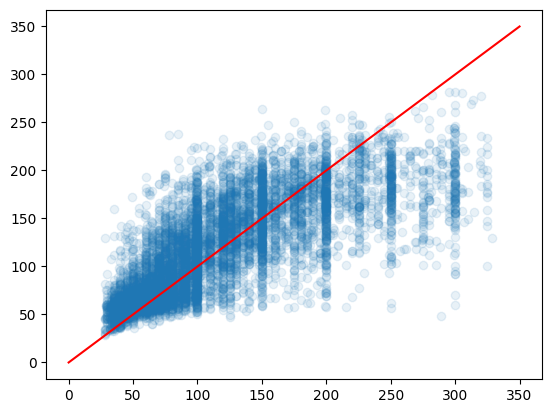

In [107]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# 예시 코드를 드리겠습니다.
# 학습 이후 이런식으로 모델의 결과를 살펴보는구나... 정도의 큰 흐름을 중심으로 이해해주세요

plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0,350], [0, 350], 'r-')

### 문제 18. 에러 값의 히스토그램 확인하기


In [ ]:
# 예시코드를 제공하겠습니다.
# 위와 마찬가지로 큰흐름을 이해하는걸 목적으로 해주세요.
# 지금 단계에서 세부 함수나 코드를 모른다고해서 스트레스 받으실 필요 전혀 없습니다.

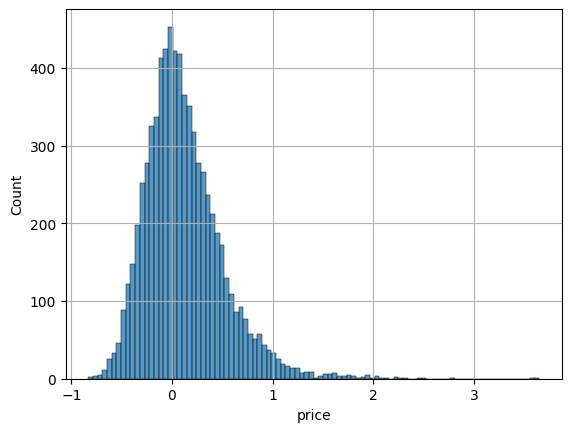

In [108]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test
sns.histplot(err)
plt.grid()

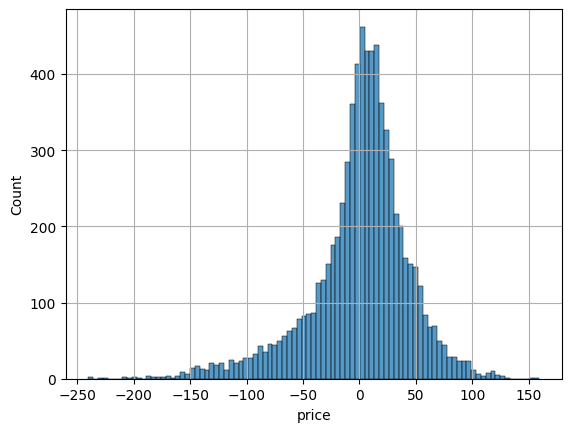

In [109]:
# err의 히스토그램으로 에러 히스토그램 확인하기
err = pred - y_test
sns.histplot(err)
plt.grid()

# 마무리

## 과제 마무리

고생하셨습니다!

여러번 강조했지만 오늘 과제는 세부적인 함수보다는 기계가 어떻게 학습하는지 그 과정과 흐름을 익히시는데 초점을 맞추시면 됩니다.

흐름에 대해 이해한 후 코드와 문법에 대해서 스스로 공부하시면 됩니다.

오늘 쓰인 라이브러리나 method, 함수들은 어차피 계속 만나게될거라 방학때 복습해놓는게 나중에도 편해요!

-


## 분반을 시작하면서




**머신러닝 분반을 준비하면서 알려드려야할게 많은데, 주어진 2달의 기간이 너무나도 짧습니다.**

-



수리적 이해가 무엇보다 중요해서 정규 세션에서는 수학을 위주로 전달되긴하지만,

**초심자 입장에서 직관적인 이해, 실무적인 코딩이 더 도움된다는것도 겪어봐서 잘 알고있습니다**

-



그래서 마음같아서는 주 2~3회 세션을 잡아서 수리적 이해와 실무적 코딩, 직관적 이해를 모두 전달해드리고 싶지만, 여러분이 학회 활동만 하지 않는다는걸 알고있어요...

-

방학이 지나고 학기가 시작되면 17기 여러분들도 학회내에서 프로젝트를 진행하게 됩니다. 

목요일 정규 세션에서 실무적인 코딩을 집중적으로 다루지않는만큼, 학기가 시작되었을때 헤매지않게 과제는 오늘처럼 코딩 위주로 내어드릴 생각입니다.

-

머신러닝을 처음 접하신분들은 처음보는 함수와 파이썬 문법 앞에서 헤매는게 지극히 정상적이고 당연한 현상입니다.

궁금한게 생기시면 언제든 연락주세요!

